# Monte Carlo Integration

Using Monte Carlo Integration check that $$\int_0^\infty dx \ x^3 \exp{\left(-\frac{x^2}{2\sigma^2}\right)} = 2\sigma^4$$


- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given N, how are the results distributed? We'll talk about model fitting at length later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks very accurate! And if N is small?)
- How does the distribution change if N increases?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

We aim to compute the integral $$\int_0^\infty dx \ x^3 \exp{\left(-\frac{x^2}{2\sigma^2}\right)}$$ which looks like a moment of the Gaussian distribution.

The normal distribution with zero mean is $$\frac{1}{\sigma \sqrt{2\pi}} \exp{\left(-\frac{x^2}{2\sigma^2}\right)}$$ which integrates to 1 over $(-\infty, +\infty)$. Since our integral is defined over the range $[0, +\infty)$, we are dealing with a half-Gaussian.

We need to renormlize the distribution over this domain and, since a Gaussian distribution with zero mean is symmetric, we define $$p(x) = \frac{2}{\sigma \sqrt{2\pi}} \exp{\left(-\frac{x^2}{2\sigma^2}\right)}$$ which integrates to 1 over $[0, +\infty)$, making it a valid pdf on the positive half-line.

This is the same of sampling from a Gaussian distribution centred in zero and, then, taking the absolute value of each sample to reflect all in the positive domain. Since this folding effectively doubles the density on $[0, +\infty)$, we normalize by dividing by 2.

Now we can rewrite the integral as $$I = \sigma \sqrt{\frac{\pi}{2}} \int_0^\infty dx \ x^3 p(x)$$

In [ ]:
# define the function to integrate f(x) = x^3
def func(x):
    return x**3

# Integral approximation with Monte Carlo method
def MC_integral(N, mu, sigma):
    normal_factor = 1/2 * np.sqrt(2 * np.pi) * sigma  # 1/2 because the integral is between [0, +inf] instead between [-inf, +inf]
    xi = abs(np.random.normal(mu, sigma, N)) # Samples generated from a normal distribution taking the absolute value
    integral = normal_factor * np.mean(func(xi)) # Monte Carlo integration
    
    return integral

In [3]:
# Gaussian parameters
mu = 0  # mean for sampling function
sigma = 2

# Expected integral results
expected_value = 2 * sigma**4

## Convergence of the integration

In [44]:
Nvals = np.unique(np.logspace(0, 6, 100, dtype=int))

integrals = []
errors = []

# Monte Carlo integration with increasing number of sampling
for N in Nvals:
    integral  = MC_integral(N, mu, sigma)
    error = abs(integral - expected_value) / expected_value # Compute the relative error
    integrals.append(integral)
    errors.append(error)

# Convert integrals and errors from list to numpy array
integrals = np.array(integrals)
errors = np.array(errors)

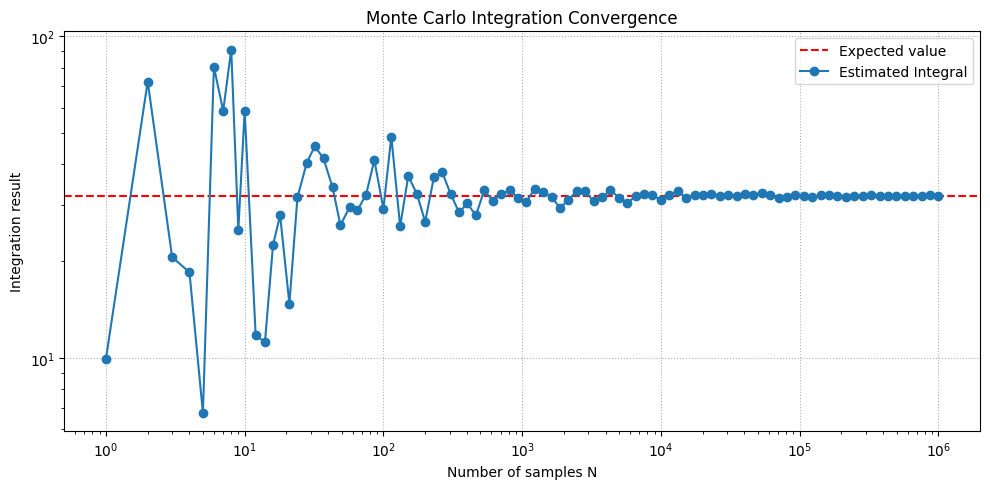

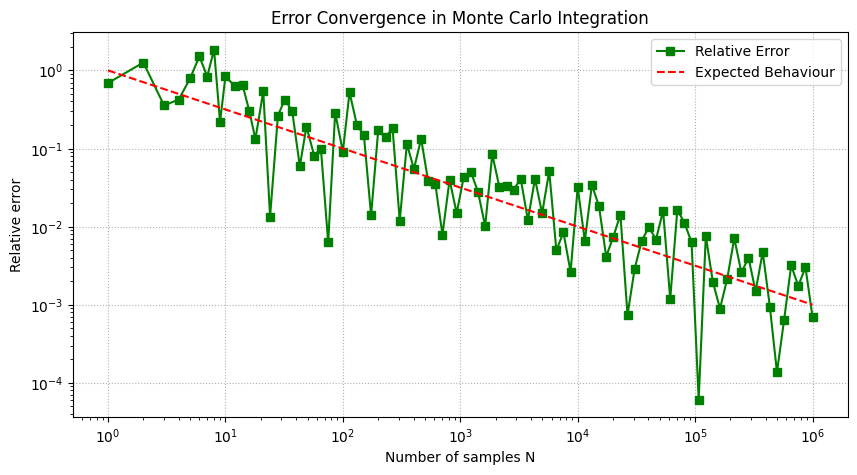

In [49]:
# Plot of estimated integrals and its error as function of the number of samplig
plt.figure(figsize=(10, 5))
plt.axhline(expected_value, color='r', linestyle='--', label='Expected value')
plt.plot(Nvals, integrals, marker='o', label='Estimated Integral')
plt.title('Monte Carlo Integration Convergence')
plt.xlabel('Number of samples N')
plt.ylabel('Integration result')
plt.loglog()
plt.legend()
plt.grid(linestyle=':')
plt.tight_layout()
plt.show()

# Plot of relative error
plt.figure(figsize=(10, 5))
plt.plot(Nvals, errors, marker='s', color='g', label="Relative Error")
plt.plot(Nvals,  Nvals**-0.5, color='r', linestyle='--', label="Expected Behaviour" )
plt.xlabel("Number of samples N")
plt.ylabel("Relative error")
plt.title("Error Convergence in Monte Carlo Integration")
plt.legend()
plt.loglog()
plt.grid(linestyle=':')
plt.show()

The results of Monte Carlo integration converge to the expected result and the errors decrease as $1/\sqrt{N}$ as expected.

## Results Distribution

In [6]:
# Set the muber of trials
trial = 10000

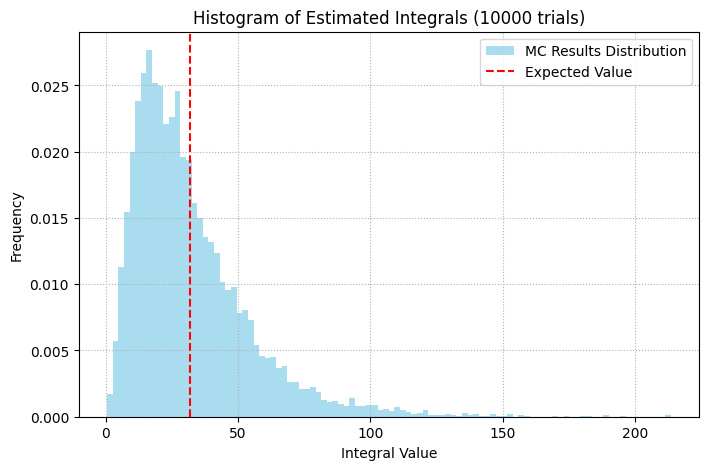

In [7]:
# For a given N study the distribution of the result
N = 10

integrale = []

# Monte Carlo integration with increasing number of sampling
for i in range(0, trial):
    integral = MC_integral(N, mu, sigma)
    integrale.append(integral)

# Convert integrale from list to numpy array
integrale = np.array(integrale)

# Plot the histogram of the results
plt.figure(figsize=(8, 5))
plt.hist(integrale, bins=100, color='skyblue', density = True, alpha=0.7, label = 'MC Results Distribution')
plt.axvline(expected_value, color='red', linestyle='--', label='Expected Value')
plt.xlabel("Integral Value")
plt.ylabel("Frequency")
plt.title(f"Histogram of Estimated Integrals ({trial} trials)")
plt.legend()
plt.grid(linestyle=':')
plt.show()

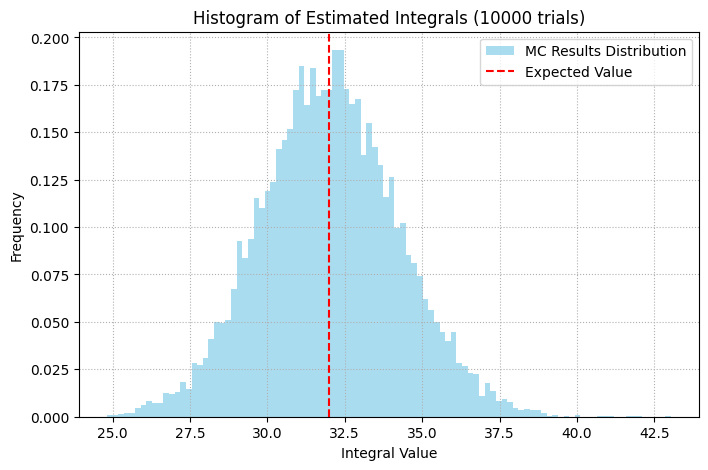

In [8]:
# Increase N 
N = 1000

integrale = []

# Monte Carlo integration with increasing number of sampling
for i in range(0, trial):
    integral = MC_integral(N, mu, sigma)
    integrale.append(integral)

# Convert integrale from list to numpy array
integrale = np.array(integrale)

# Plot the histogram of the results
plt.figure(figsize=(8, 5))
plt.hist(integrale, bins=100, color='skyblue', density = True, alpha=0.7, label = 'MC Results Distribution')
plt.axvline(expected_value, color='red', linestyle='--', label='Expected Value')
plt.xlabel("Integral Value")
plt.ylabel("Frequency")
plt.title(f"Histogram of Estimated Integrals ({trial} trials)")
plt.legend()
plt.grid(linestyle=':')
plt.show()

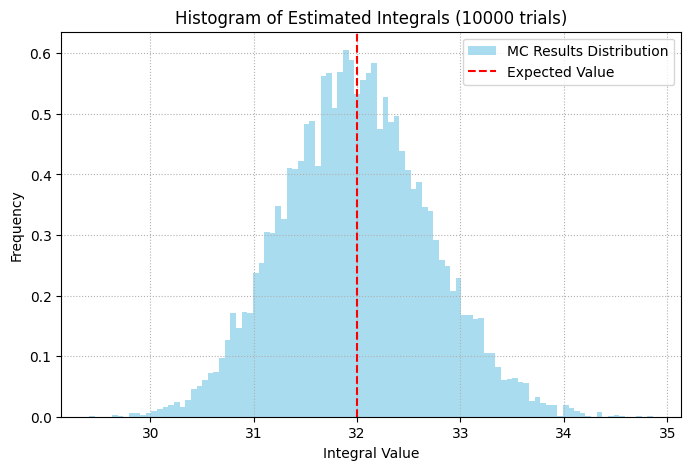

In [9]:
# Increase N 
N = 10000

integrale = []

# Monte Carlo integration with increasing number of sampling
for i in range(0, trial):
    integral = MC_integral(N, mu, sigma)
    integrale.append(integral)

# Convert integrale from list to numpy array
integrale = np.array(integrale)

# Plot the histogram of the results
plt.figure(figsize=(8, 5))
plt.hist(integrale, bins=100, color='skyblue', density=True, alpha=0.7, label='MC Results Distribution')
plt.axvline(expected_value, color='red', linestyle='--', label='Expected Value')
plt.xlabel("Integral Value")
plt.ylabel("Frequency")
plt.title(f"Histogram of Estimated Integrals ({trial} trials)")
plt.legend()
plt.grid(linestyle=':')
plt.show()

The distribution of the results looks like a Poisson distribution for small $N$, while for large $N$ becomes Gaussian. As N increases, the width of the distribution decreases.

### Manual Fit

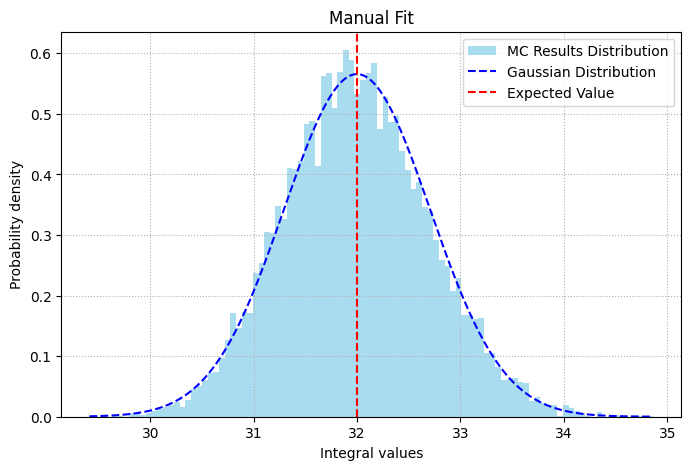

In [10]:
# Parameter Estimation 
mean = np.average(integrale)
std = np.std(integrale, ddof=1)

# Gassian distribution with estimated parameters
x = np.linspace(min(integrale), max(integrale), 1000)
estimated_Gauss = norm.pdf(x, loc=expected_value, scale=std)

# Plot
plt.figure(figsize=(8, 5))
plt.hist(integrale, bins=100, density=True , color='skyblue', alpha=0.7, label='MC Results Distribution')
plt.plot(x, estimated_Gauss, color='b', ls='--', label='Gaussian Distribution')
plt.axvline(expected_value, color='red', linestyle='--', label='Expected Value')
plt.title('Manual Fit')
plt.xlabel('Integral values')
plt.ylabel('Probability density')
plt.legend()
plt.grid(linestyle=':')
plt.show()